In [235]:

X, y = datasets.make_blobs(n_samples=1500, n_features= 4, centers = 2, cluster_std = 1.05, random_state =2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state =123)


p = Perceptron(learning_rate=0.01, n_iters=1)
p.fit_sigmoid(X_train, y_train)
predictions = p.predict_sigmoid(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))




Perceptron classification accuracy 1.0


In [570]:
a = np.empty((np.array([1,3,4]).size,3))

In [7]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [9]:
data1 = pd.read_csv("iris_data", sep = ",", header = None)
data1.columns =  ['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'class']
data1['class'] = data1['class'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 1])


data1 = data1.to_numpy()
data1

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [10]:
data2 = pd.read_csv("iris_data", sep = ",", header = None)
data2.columns =  ['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'class']
data2 = data2[data2['class'] != 'Iris-setosa']
data2['class'] = data2['class'].replace(['Iris-versicolor', 'Iris-virginica'], [0, 1])
data2 = data2.to_numpy()

data2

array([[7. , 3.2, 4.7, 1.4, 0. ],
       [6.4, 3.2, 4.5, 1.5, 0. ],
       [6.9, 3.1, 4.9, 1.5, 0. ],
       [5.5, 2.3, 4. , 1.3, 0. ],
       [6.5, 2.8, 4.6, 1.5, 0. ],
       [5.7, 2.8, 4.5, 1.3, 0. ],
       [6.3, 3.3, 4.7, 1.6, 0. ],
       [4.9, 2.4, 3.3, 1. , 0. ],
       [6.6, 2.9, 4.6, 1.3, 0. ],
       [5.2, 2.7, 3.9, 1.4, 0. ],
       [5. , 2. , 3.5, 1. , 0. ],
       [5.9, 3. , 4.2, 1.5, 0. ],
       [6. , 2.2, 4. , 1. , 0. ],
       [6.1, 2.9, 4.7, 1.4, 0. ],
       [5.6, 2.9, 3.6, 1.3, 0. ],
       [6.7, 3.1, 4.4, 1.4, 0. ],
       [5.6, 3. , 4.5, 1.5, 0. ],
       [5.8, 2.7, 4.1, 1. , 0. ],
       [6.2, 2.2, 4.5, 1.5, 0. ],
       [5.6, 2.5, 3.9, 1.1, 0. ],
       [5.9, 3.2, 4.8, 1.8, 0. ],
       [6.1, 2.8, 4. , 1.3, 0. ],
       [6.3, 2.5, 4.9, 1.5, 0. ],
       [6.1, 2.8, 4.7, 1.2, 0. ],
       [6.4, 2.9, 4.3, 1.3, 0. ],
       [6.6, 3. , 4.4, 1.4, 0. ],
       [6.8, 2.8, 4.8, 1.4, 0. ],
       [6.7, 3. , 5. , 1.7, 0. ],
       [6. , 2.9, 4.5, 1.5, 0. ],
       [5.7, 2

In [651]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=5, n_epochs = 1):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.n_epochs = n_epochs
        self.activation_func = self.slenk
        self.sigmoid = self.sigmoid
        self.sigmoid2 = self.sigmoid2
        self.weights = None
        self.bias = None
        self.paklaida = 0
        
        
    def slenk(self, x):
        return np.where(x>= 0, 1, 0)
    
    def sigmoid(self, x):
        return np.where((1/(1 + np.exp(-x))) >= 0.4, 1, 0)
    
    def sigmoid2(self, x):
        return 1/(1+np.exp(-x))
    
    def fit_slenk(self, X, y):
        n_samples, n_features = X.shape
        
        # init weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        y_ = np.array([1 if i > 0 else 0 for i in y])
        print("TYPE IS " + str(type(y_[1])))
        predicted = np.zeros((y_.size), dtype ="int64")
        for _e in range(self.n_epochs):
            for _ in range(self.n_iters):
                print(y_)
                print(predicted)
                if(not np.array_equal(y_,predicted)):
                    predicted = np.zeros((y_.size), dtype = "int64")
                    for idx, x_i in enumerate(X):
                        linear_output = np.dot(x_i, self.weights) + self.bias
                        y_predicted = self.activation_func(linear_output)
                        #print(str(_) +"real {" + str(y_[idx]) + "} , predicted {"+ str(y_predicted) + "}")
                        if(y_[idx] != y_predicted):
                            update = self.lr * (y_[idx] - y_predicted)
                            self.weights += update * x_i
                            self.bias += update
                        
                        self.paklaida += (y_[idx] - y_predicted)**2
                    
                        linear_output = np.dot(x_i, self.weights) + self.bias
                        y_predicted = self.activation_func(linear_output)
                    
                        predicted[idx] = y_predicted
                else:
                    print("RASTI SVORIAI")
                    break   
                        
                self.paklaida = self.paklaida/2
                                    
    def fit_sigmoid(self, X, y):
        n_samples, n_features = X.shape
        
        # init weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        y_ = np.array([1 if i > 0 else 0 for i in y])
        
        for _ in range(self.n_epochs):
            for _ in range(self.n_iters):
                for idx, x_i in enumerate(X):
                    linear_output = np.dot(x_i, self.weights) + self.bias
                    #print(linear_output)
                    y_predicted = self.sigmoid(linear_output)
                    
                    y_predicted2 = self.sigmoid2(linear_output)
                    self.paklaida += (y_[idx] - y_predicted2)**2
                    
                    if(y_predicted != y_[idx]):
                        update = self.lr * (y_[idx] - y_predicted)
                        self.weights += update * x_i
                        self.bias += update
                    
                    
                self.paklaida = self.paklaida/2
                    
                    
    
    def predict_slenk(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_output)
        return y_predicted
    
    
    def predict_sigmoid(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_output)
        return y_predicted

In [652]:
data1_x = data1[:,0:4]
data1_y = data1[:,4]
data2_x = data2[:,0:4]
data2_y = data2[:,4]

TYPE IS <class 'numpy.int64'>
[1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1]
[1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0

Text(0, 0.5, 'Klasifikavimo tikslumas')

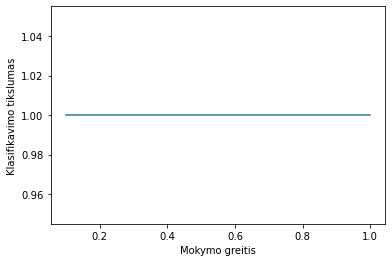

In [665]:
# Slenkstine funkcija
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

p = Perceptron(learning_rate=0.1, n_iters=10)
X_train, X_test, y_train, y_test = train_test_split(data1_x, data1_y, test_size = 0.2, random_state =123)
p.fit_slenk(X_train, y_train)
predictions = p.predict_slenk(X_test)

print(p.weights)
print(p.bias)
print(p.paklaida)
x = [0.1, 0.3, 0.5, 0.6, 0.8, 1]
y = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
plt.plot(x,y)
plt.xlabel("Mokymo greitis")
plt.ylabel("Klasifikavimo tikslumas")


In [602]:
print(accuracy(y_test, predictions))

1.0


In [672]:
# SIGMOIDINE
p = Perceptron(learning_rate= 1, n_iters = 10)
X_train, X_test, y_train, y_test = train_test_split(data1_x, data1_y, test_size = 0.2, random_state =123)

p.fit_sigmoid(X_train, y_train)
predictions = p.predict_sigmoid(X_test)
print(p.weights)
print(p.bias)
print(p.paklaida)

print(accuracy(y_test, predictions))

[-1.6 -6.   7.8  3.4]
-1
0.009015117523375417
1.0


TYPE IS <class 'numpy.int64'>
[0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0
 1 1 1 0 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0
 1 1 1 0 1 1]
[0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0
 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0
 1 1 1 0 1 1]
[0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0
 1 1 1 0 1 1]
[0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0


Text(0, 0.5, 'Klasifikavimo tikslumas')

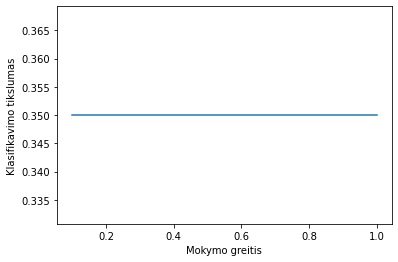

In [671]:
# SLENKSTINE SU DATA 2
p = Perceptron(learning_rate = 1, n_iters = 100)
X_train, X_test, y_train, y_test = train_test_split(data2_x, data2_y, test_size = 0.2, random_state = 123)
p.fit_slenk(X_train,y_train)
predictions = p.predict_slenk(X_test)
print(p.weights)
print(p.bias)
print(p.paklaida)
x = [0.1, 0.3, 0.5, 0.6, 0.8, 1]
y = [0.35, 0.35, 0.35, 0.35, 0.35, 0.35]
print(accuracy(y_test, predictions))
plt.plot(x,y)
plt.xlabel("Mokymo greitis")
plt.ylabel("Klasifikavimo tikslumas")

In [663]:
accuracy(predictions ,y_test)

1.0

In [386]:
# SIGMODINE SU DATA 2
p = Perceptron(learning_rate = 1, n_iters = 1, n_epochs = 1)
X_train, X_test, y_train, y_test = train_test_split(data2_x, data2_y, test_size = 0.2, random_state = 123)
p.fit_sigmoid(X_train,y_train)
predictions = p.predict_sigmoid(X_test)
print(p.weights)
print(p.bias)
print(p.paklaida)

real {0} , predicted {1}
real {1} , predicted {0}
real {0} , predicted {1}
real {0} , predicted {0}
real {0} , predicted {0}
real {1} , predicted {0}
real {1} , predicted {1}
real {0} , predicted {1}
real {1} , predicted {0}
real {0} , predicted {1}
real {0} , predicted {0}
real {1} , predicted {0}
real {0} , predicted {1}
real {1} , predicted {0}
real {1} , predicted {1}
real {1} , predicted {1}
real {1} , predicted {1}
real {1} , predicted {1}
real {1} , predicted {1}
real {0} , predicted {1}
real {0} , predicted {0}
real {1} , predicted {0}
real {0} , predicted {1}
real {1} , predicted {0}
real {0} , predicted {1}
real {1} , predicted {1}
real {0} , predicted {1}
real {1} , predicted {0}
real {0} , predicted {1}
real {1} , predicted {0}
real {0} , predicted {1}
real {0} , predicted {0}
real {1} , predicted {0}
real {0} , predicted {1}
real {0} , predicted {0}
real {1} , predicted {0}
real {0} , predicted {1}
real {0} , predicted {0}
real {1} , predicted {0}
real {0} , predicted {1}


In [359]:
accuracy(predictions, y_test)

0.95

In [245]:
print(np.array(y_test))
predictions

[0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0.]


array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
plot(predic)